In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, glob

Data has downloaded from: https://www3.paho.org/data/index.php/en/mnu-topics/indicadores-dengue-en/dengue-nacional-en/252-dengue-pais-ano-en.html

In [2]:
# Get CSV files list from a folder
path = 'datas/'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
big_df   = pd.concat(df_list, ignore_index=True)

In [3]:
big_df=big_df.drop(index=big_df[big_df["EW"]-big_df["Epidemiological Week (a)"]!=0].index,columns=["ID","Serotype","Epidemiological Week (a)","In / Out of Subregions"])
big_df.index=big_df["Year"]+(big_df["EW"]-1)/52

In [4]:
colombia=big_df[big_df["Country or Subregion"]=="Colombia"].sort_values(by=["Year","EW"])
brazil=big_df[big_df["Country or Subregion"]=="Brazil"].sort_values(by=["Year","EW"])

In [5]:
colombia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 2014.0 to 2023.4615384615386
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country or Subregion       493 non-null    object 
 1   Year                       493 non-null    int64  
 2   EW                         493 non-null    int64  
 3   (C/TC) x100 (e)            400 non-null    float64
 4   (SD/D) x100 (e)            493 non-null    float64
 5   CFR (f)                    493 non-null    float64
 6   Confirmed                  400 non-null    float64
 7   Deaths                     493 non-null    int64  
 8   Incidence Rate (c)         493 non-null    object 
 9   Population X 1000          493 non-null    int64  
 10  Severe Dengue (d)          493 non-null    int64  
 11  Total of Dengue Cases (b)  493 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 50.1+ KB


In [6]:
brazil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 2014.0 to 2023.4807692307693
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country or Subregion       494 non-null    object 
 1   Year                       494 non-null    int64  
 2   EW                         494 non-null    int64  
 3   (C/TC) x100 (e)            492 non-null    float64
 4   (SD/D) x100 (e)            494 non-null    float64
 5   CFR (f)                    494 non-null    float64
 6   Confirmed                  492 non-null    float64
 7   Deaths                     494 non-null    int64  
 8   Incidence Rate (c)         494 non-null    object 
 9   Population X 1000          494 non-null    int64  
 10  Severe Dengue (d)          494 non-null    int64  
 11  Total of Dengue Cases (b)  494 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 50.2+ KB


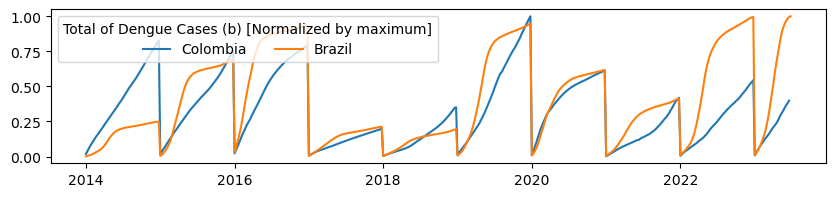

In [7]:
plt.figure(figsize=(10,2))
(colombia["Total of Dengue Cases (b)"]/colombia["Total of Dengue Cases (b)"].max()).plot(label="Colombia")
(brazil["Total of Dengue Cases (b)"]/brazil["Total of Dengue Cases (b)"].max()).plot(label="Brazil")
plt.legend(title="Total of Dengue Cases (b) [Normalized by maximum]",ncol=2)
plt.show()

In [8]:
vec11,vec21,vec12,vec22,vec13,vec23=[],[],[],[],[],[]
for i in np.arange(2014,2024,1):
    #vec1.append((colombia[colombia["Year"]==i]["Total of Dengue Cases (b)"]).diff().values)
    vec11.append(np.diff(np.hstack((0, colombia[colombia["Year"]==i]["Total of Dengue Cases (b)"]))))
for i in np.arange(2014,2024,1):
    #vec2.append((brazil[brazil["Year"]==i]["Total of Dengue Cases (b)"]).diff().values)
    vec21.append(np.diff(np.hstack((0, brazil[brazil["Year"]==i]["Total of Dengue Cases (b)"]))))
for i in np.arange(2014,2024,1):
    #vec1.append((colombia[colombia["Year"]==i]["Total of Dengue Cases (b)"]).diff().values)
    vec12.append(np.diff(np.hstack((0, colombia[colombia["Year"]==i]["Deaths"]))))
for i in np.arange(2014,2024,1):
    #vec2.append((brazil[brazil["Year"]==i]["Total of Dengue Cases (b)"]).diff().values)
    vec22.append(np.diff(np.hstack((0, brazil[brazil["Year"]==i]["Deaths"]))))
for i in np.arange(2014,2024,1):
    #vec1.append((colombia[colombia["Year"]==i]["Total of Dengue Cases (b)"]).diff().values)
    vec13.append(np.diff(np.hstack((0, colombia[colombia["Year"]==i]["Severe Dengue (d)"]))))
for i in np.arange(2014,2024,1):
    #vec2.append((brazil[brazil["Year"]==i]["Total of Dengue Cases (b)"]).diff().values)
    vec23.append(np.diff(np.hstack((0, brazil[brazil["Year"]==i]["Severe Dengue (d)"]))))
colombia["Total of Dengue Cases (uncumulate)"]=np.hstack(vec11)
brazil["Total of Dengue Cases (uncumulate)"]=np.hstack(vec21)
colombia["Deaths"]=np.hstack(vec12)
brazil["Deaths"]=np.hstack(vec22)
colombia["Severe Dengue (uncumulate)"]=np.hstack(vec13)
brazil["Severe Dengue (uncumulate)"]=np.hstack(vec23)

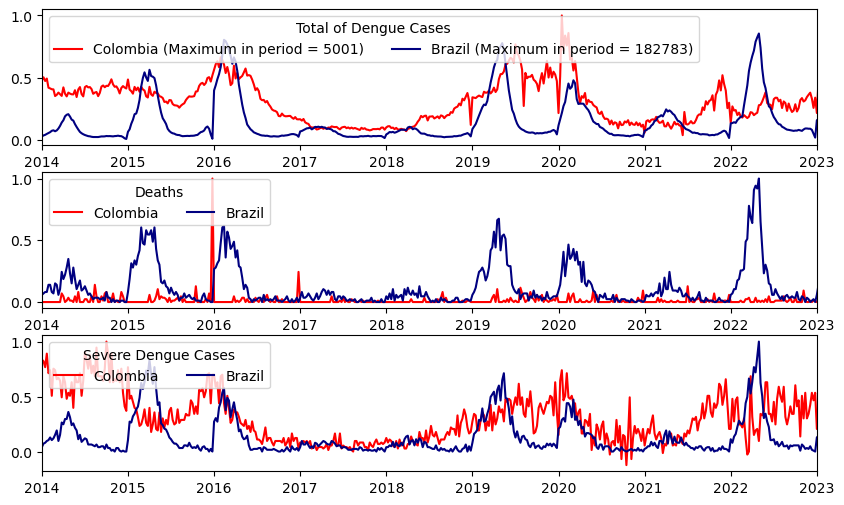

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(311)
(colombia["Total of Dengue Cases (uncumulate)"]/colombia["Total of Dengue Cases (uncumulate)"].max()).plot(label="Colombia (Maximum in period = {})".format(colombia["Total of Dengue Cases (uncumulate)"].max()),c="red")
(brazil["Total of Dengue Cases (uncumulate)"]/brazil["Total of Dengue Cases (uncumulate)"].max()).plot(label="Brazil (Maximum in period = {})".format(brazil["Total of Dengue Cases (uncumulate)"].max()),c="navy")
plt.legend(title="Total of Dengue Cases".format(),ncol=2,loc=2);plt.xlim(2014,2023)
plt.subplot(312)
(colombia["Deaths"]/colombia["Deaths"].max()).plot(label="Colombia",c="red")
(brazil["Deaths"]/brazil["Deaths"].max()).plot(label="Brazil",c="navy")
plt.legend(title="Deaths",ncol=2,loc=2);plt.xlim(2014,2023)
plt.subplot(313)
(colombia["Severe Dengue (uncumulate)"]/colombia["Severe Dengue (uncumulate)"].max()).plot(label="Colombia",c="red")
(brazil["Severe Dengue (uncumulate)"]/brazil["Severe Dengue (uncumulate)"].max()).plot(label="Brazil",c="navy")
plt.legend(title="Severe Dengue Cases",ncol=2,loc=2);plt.xlim(2014,2023)

plt.savefig("series.pdf",dpi=400,bbox_inches='tight')
plt.show()

In [10]:
len(np.array(brazil["Total of Dengue Cases (uncumulate)"]))

494

# Analizing using visibility graph analysis and network analysis...

In [11]:
from visibility_graph import visibility_graph
import networkx as nx
import sys
import statsmodels.api as sm

def drop_zeros(a_list):
    return [i for i in a_list if i>0]

In [12]:
g_brazil_TDC = visibility_graph(brazil["Total of Dengue Cases (uncumulate)"])
nx.write_edgelist(g_brazil_TDC, "g_brazil_TDC_vis_results")
g_brazil_D = visibility_graph(brazil["Deaths"])
nx.write_edgelist(g_brazil_D, "g_brazil_D_vis_results")

In [13]:
g_colombia_TDC = visibility_graph(colombia["Total of Dengue Cases (uncumulate)"])
nx.write_edgelist(g_colombia_TDC, "g_colombia_TDC_vis_results")
g_colombia_D = visibility_graph(colombia["Deaths"])
nx.write_edgelist(g_colombia_D, "g_colombia_D_vis_results")

In [14]:
g_colombia_SD = visibility_graph(colombia["Severe Dengue (uncumulate)"])
nx.write_edgelist(g_colombia_SD, "g_colombia_SD_vis_results")
g_brazil_SD = visibility_graph(brazil["Severe Dengue (uncumulate)"])
nx.write_edgelist(g_brazil_SD, "g_brazil_SD_vis_results")

In [15]:
def get_alpha(data,li_fit,ls_fit,xlimi,xlims,ylimi,ylims,color,name):
    G = nx.read_edgelist(data, nodetype=int)
    # Calculate degree distribution
    degree_sequence = G.degree()#[G.degree(node) for node in G.nodes()]
    degree_count = drop_zeros(nx.degree_histogram(G))
    degrees = range(len(degree_count))
    # Normalize the degree distribution
    degree_distribution = [count / float(sum(degree_count)) for count in degree_count]
    # Calcule alpha
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 
    print_model = model.summary()

    # Plot degree distribution
    plt.figure(figsize=(6,4))
    plt.plot(x0,y0,color=color,linewidth=0,marker="P",markersize=5,label="data")
    a=np.linspace(li_fit,ls_fit,10)
    plt.plot(a,(a)*(model.params[1])+model.params[0]*1.,color=color,lw=3,label=r"fit ($\alpha_0={}$)".format(-np.round(model.params[1],2)),alpha=0.5)
    plt.xlabel(r'$\log_{10}(k)$ (Degree)'); plt.ylabel(r'$\log_{10} P(k)$'); plt.title('Degree Distribution {}'.format(name)); 
    plt.legend(); plt.xlim(xlimi,xlims); plt.ylim(ylimi,ylims); plt.legend(title=r"$P(k)\sim x^{-\alpha_0}$"); plt.grid(alpha=0.5)
    plt.savefig(data+".pdf",dpi=400,bbox_inches='tight')
    plt.show()
    return x0,y0,li_fit,ls_fit,xlimi,xlims,np.round(model.params[0],2),np.round(model.params[1],2), G

/tmp/ipykernel_15902/3977737503.py:10: RuntimeWarning: divide by zero encountered in log10
  x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))


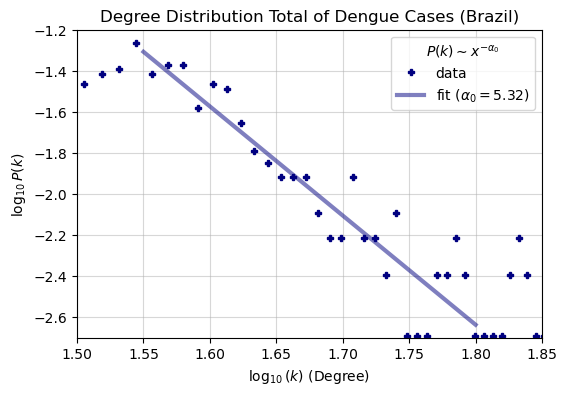

In [16]:
g_brazil_TDC=get_alpha("g_brazil_TDC_vis_results",1.55,1.8,1.5,1.85,-2.7,-1.2,"navy","Total of Dengue Cases (Brazil)")

/tmp/ipykernel_15902/3977737503.py:10: RuntimeWarning: divide by zero encountered in log10
  x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))


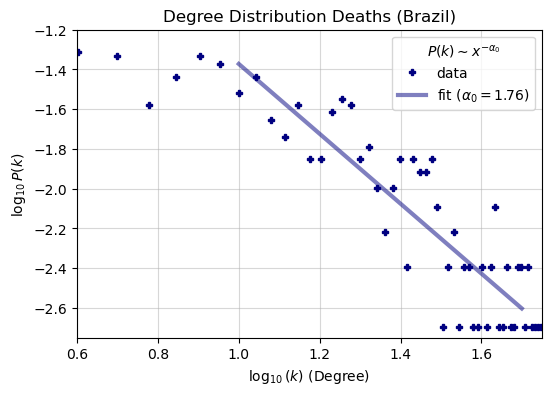

In [17]:
g_brazil_D=get_alpha("g_brazil_D_vis_results",1.0,1.7,0.6,1.75,-2.75,-1.2,"navy","Deaths (Brazil)")

/tmp/ipykernel_15902/3977737503.py:10: RuntimeWarning: divide by zero encountered in log10
  x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))


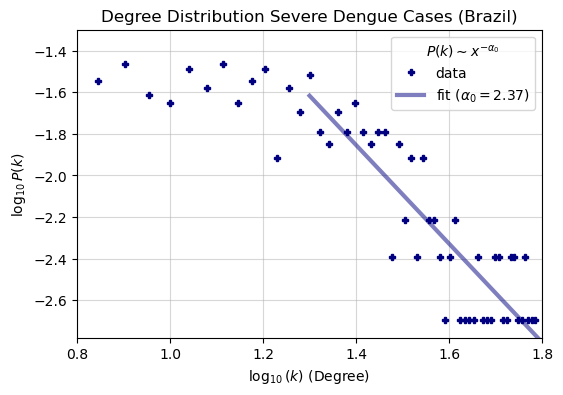

In [18]:
g_brazil_SD=get_alpha("g_brazil_SD_vis_results",1.3,1.8,0.8,1.8,-2.78,-1.3,"navy","Severe Dengue Cases (Brazil)")

/tmp/ipykernel_15902/3977737503.py:10: RuntimeWarning: divide by zero encountered in log10
  x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))


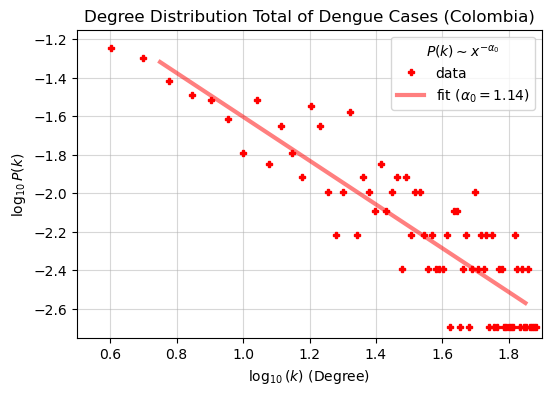

In [19]:
g_colombia_TDC=get_alpha("g_colombia_TDC_vis_results",0.75,1.85,0.5,1.9,-2.75,-1.15,"red","Total of Dengue Cases (Colombia)")

/tmp/ipykernel_15902/3977737503.py:10: RuntimeWarning: divide by zero encountered in log10
  x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))


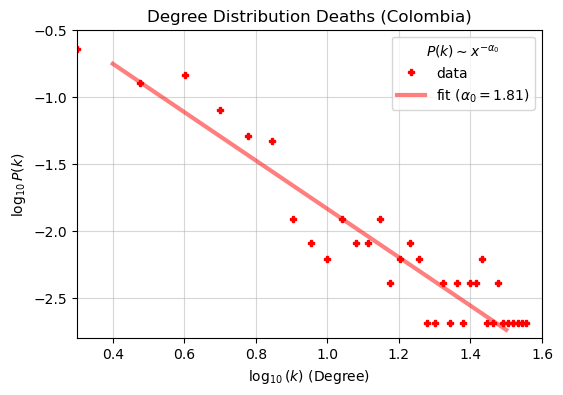

In [20]:
g_colombia_D=get_alpha("g_colombia_D_vis_results",0.4,1.5,0.3,1.6,-2.8,-0.5,"red","Deaths (Colombia)")

/tmp/ipykernel_15902/3977737503.py:10: RuntimeWarning: divide by zero encountered in log10
  x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))


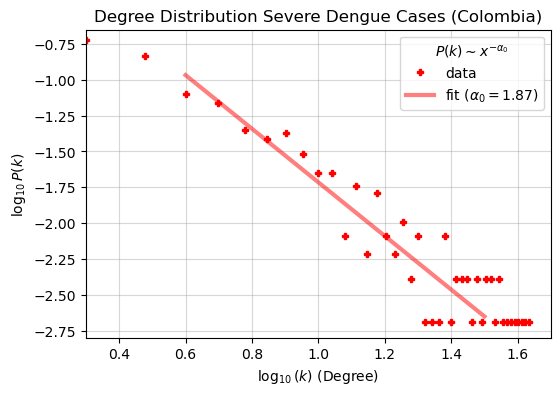

In [21]:
g_colombia_SD=get_alpha("g_colombia_SD_vis_results",0.6,1.5,0.3,1.7,-2.8,-0.65,"red","Severe Dengue Cases (Colombia)")

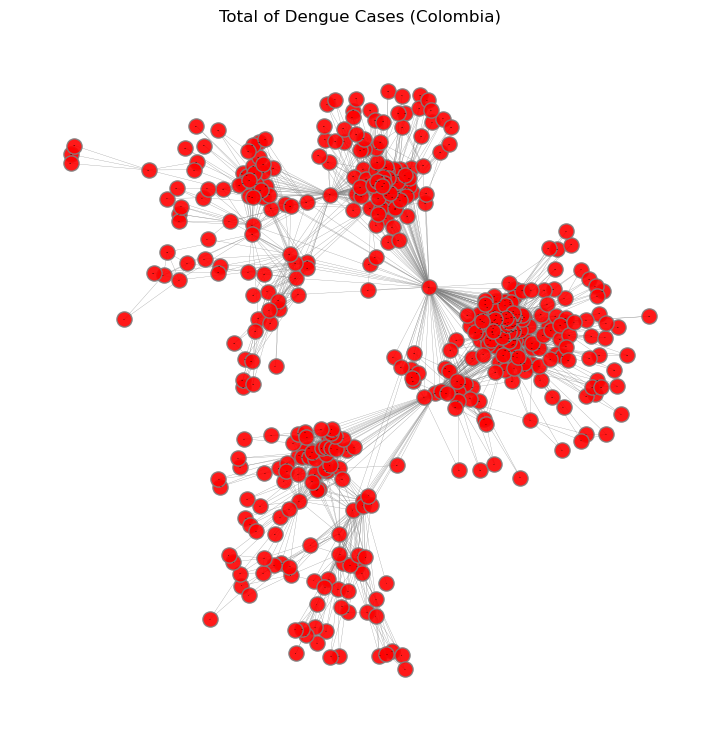

In [22]:
plt.figure(figsize=(7,7))
options = {"edgecolors": "tab:gray", "alpha": 0.9}
nodes=nx.draw(g_colombia_TDC[-1], 
              pos=nx.spring_layout(g_colombia_TDC[-1], seed = 120), 
              with_labels=True, node_color='red', edge_color='gray', 
              width=0.2, node_size=120, font_size=0, **options)
plt.title("Total of Dengue Cases (Colombia)")
plt.savefig("colombia_network.pdf",dpi=400,bbox_inches='tight')
plt.show()

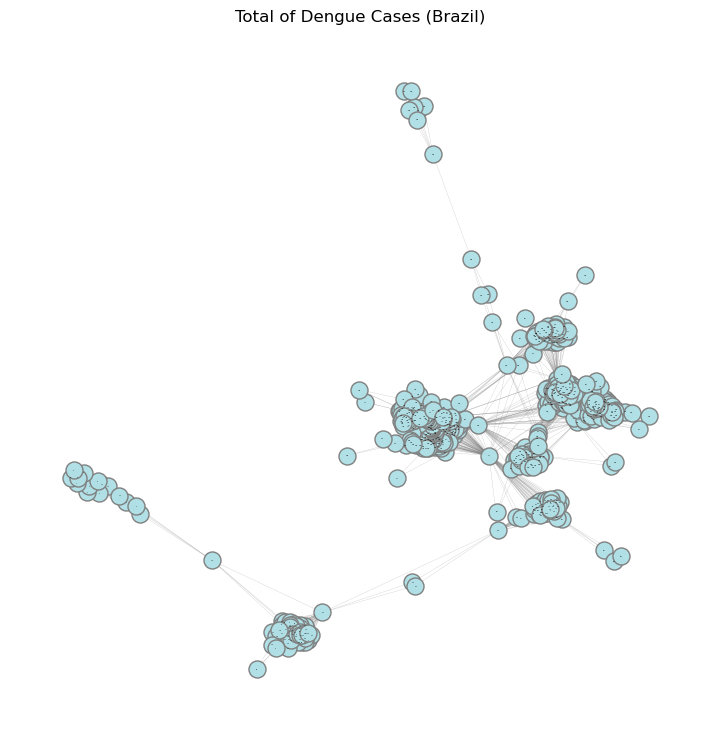

In [23]:
plt.figure(figsize=(7,7))
options = {"edgecolors": "tab:gray", "alpha": 0.99}
nodes=nx.draw(g_brazil_TDC[-1], pos=nx.spring_layout(g_brazil_TDC[-1], seed = 120), with_labels=True, node_color='powderblue', edge_color='gray', width=0.1, node_size=150, font_size=0, **options)
plt.title("Total of Dengue Cases (Brazil)")
plt.savefig("brazil_network.pdf",dpi=400,bbox_inches='tight')
plt.show()

In [24]:
## The Shannon coefficients for entropy
from scipy.stats import entropy
base=2
for j in ["Total of Dengue Cases (uncumulate)","Deaths","Severe Dengue (uncumulate)"]:
    print("Entropy for {} variable in Colombia".format(j),entropy(colombia[j], base=base))
    print("Entropy for {} variable in Brazil".format(j),entropy(brazil[j], base=base))

Entropy for Total of Dengue Cases (uncumulate) variable in Colombia 8.732914167840436
Entropy for Total of Dengue Cases (uncumulate) variable in Brazil 8.122351833099462
Entropy for Deaths variable in Colombia 6.593591201034169
Entropy for Deaths variable in Brazil 7.9008352683562055
Entropy for Severe Dengue (uncumulate) variable in Colombia -inf
Entropy for Severe Dengue (uncumulate) variable in Brazil 8.045490932055625


## Some statistics...

In [25]:
colombia["Severe Dengue (uncumulate)"].info()

<class 'pandas.core.series.Series'>
Index: 493 entries, 2014.0 to 2023.4615384615386
Series name: Severe Dengue (uncumulate)
Non-Null Count  Dtype
--------------  -----
493 non-null    int64
dtypes: int64(1)
memory usage: 7.7 KB


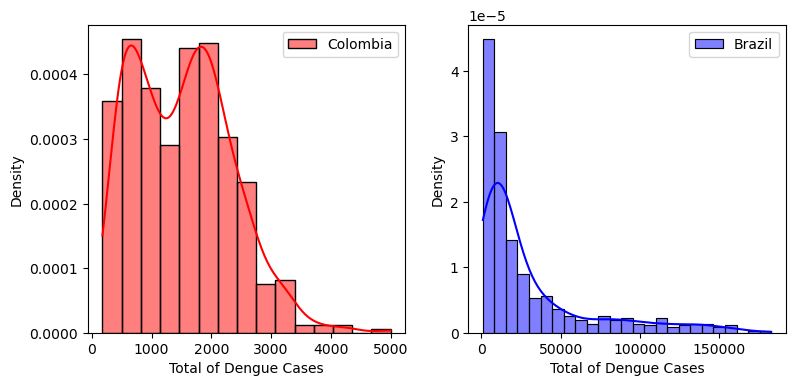

In [26]:
import seaborn as sns
plt.figure(figsize=(9,4))
plt.subplot(121)
sns.histplot(data=colombia, x="Total of Dengue Cases (uncumulate)", kde=True, stat="density", cumulative=False, common_norm=False, label="Colombia", color="r")
plt.xlabel("Total of Dengue Cases"); plt.legend()
plt.subplot(122)
sns.histplot(data=brazil, x="Total of Dengue Cases (uncumulate)", kde=True, stat="density", cumulative=False, common_norm=False, label="Brazil", color="b")
plt.xlabel("Total of Dengue Cases"); plt.legend()
plt.show()

In [27]:
colombia[["Total of Dengue Cases (uncumulate)","Deaths","Severe Dengue (uncumulate)"]].describe()

,Total of Dengue Cases (uncumulate),Deaths,Severe Dengue (uncumulate)
count,493.000000,493.000000,493.000000
mean,1526.480730,1.223124,22.316430
std,822.088344,4.377849,15.903331
min,178.000000,0.000000,-9.000000
25%,804.000000,0.000000,9.000000
50%,1537.000000,0.000000,20.000000
75%,2082.000000,1.000000,32.000000
max,5001.000000,86.000000,73.000000


In [28]:
822.08/1526.48

0.5385461977883759

In [29]:
brazil[["Total of Dengue Cases (uncumulate)","Deaths","Severe Dengue (uncumulate)"]].describe()

,Total of Dengue Cases (uncumulate),Deaths,Severe Dengue (uncumulate)
count,494.000000,494.000000,494.000000
mean,30075.315789,11.489879,18.564777
std,37148.072427,15.812764,23.286531
min,880.000000,0.000000,0.000000
25%,6600.750000,2.000000,4.000000
50%,13728.000000,5.000000,8.000000
75%,36096.500000,14.000000,24.750000
max,182783.000000,86.000000,125.000000


In [30]:
37148.07/30075.31

1.2351683158045585

In [31]:
g_colombia_TDC[0][1:].mean()/g_brazil_TDC[0][1:].mean()

0.9479718034435618

In [32]:
g_colombia_TDC[0][1:].std()/g_brazil_TDC[0][1:].std()

0.9882941702550884

## Clustering measures in network graph

In [33]:
def calculate_metrics(g):
    G = nx.read_edgelist(g, nodetype=int)
    #G = nx.Graph(G)

    # Calcula las medidas de centralidad y otras métricas
    betweenness_centrality = np.mean(list(nx.betweenness_centrality(G).values()))
    closeness_centrality = np.mean(list(nx.closeness_centrality(G).values()))
    eigenvector_centrality = np.mean(list(nx.eigenvector_centrality(G).values()))
    clustering_coefficient = np.mean(list(nx.clustering(G).values()))
    assortativity_coefficient = nx.degree_assortativity_coefficient(G)
    #modularity = nx.modularity(G)
    #katz_centrality = nx.katz_centrality(G)

    # Imprime los resultados
    print("Betweenness Centrality:", betweenness_centrality)
    print("Closeness Centrality:", closeness_centrality)
    print("Eigenvector Centrality:", eigenvector_centrality)
    print("Clustering Coefficient:", clustering_coefficient)
    print("Assortativity Coefficient:", assortativity_coefficient)
    #print("Modularity:", modularity)
    #print("Katz Centrality:", katz_centrality)
    return nx.betweenness_centrality(G), nx.closeness_centrality(G), nx.eigenvector_centrality(G), nx.clustering(G)

In [34]:
col=calculate_metrics("g_brazil_TDC_vis_results")

Betweenness Centrality: 0.00447180843851044
Closeness Centrality: 0.3268821402369802
Eigenvector Centrality: 0.025223633802115526
Clustering Coefficient: 0.7348608421737349
Assortativity Coefficient: -0.01296089551373744


In [35]:
bra=calculate_metrics("g_colombia_TDC_vis_results")

Betweenness Centrality: 0.004555623814790679
Closeness Centrality: 0.3180380853004211
Eigenvector Centrality: 0.021995925014838335
Clustering Coefficient: 0.7091745975704903
Assortativity Coefficient: 0.08627774171291559


## Nodos más conectados...

In [36]:
def plot_metrics(g):
    G = nx.read_edgelist(g, nodetype=int)
    degree_centrality = nx.degree_centrality(G)
    # Encuentra los nodos con mayor centralidad de grado
    top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:20]
    return top_nodes

In [37]:
np.unique(np.round(brazil.iloc[plot_metrics("g_brazil_TDC_vis_results")].index,1))

array([2016.1, 2016.2, 2016.3, 2019.1, 2019.2, 2019.3, 2022.3])

In [38]:
np.unique(np.round(colombia.iloc[plot_metrics("g_colombia_TDC_vis_results")].index,1))

array([2016.1, 2016.4, 2016.5, 2016.6, 2017. , 2018.4, 2018.9, 2019.3,
       2019.4, 2019.5, 2020. ])